
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
%reload_ext autoreload
%autoreload 2

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

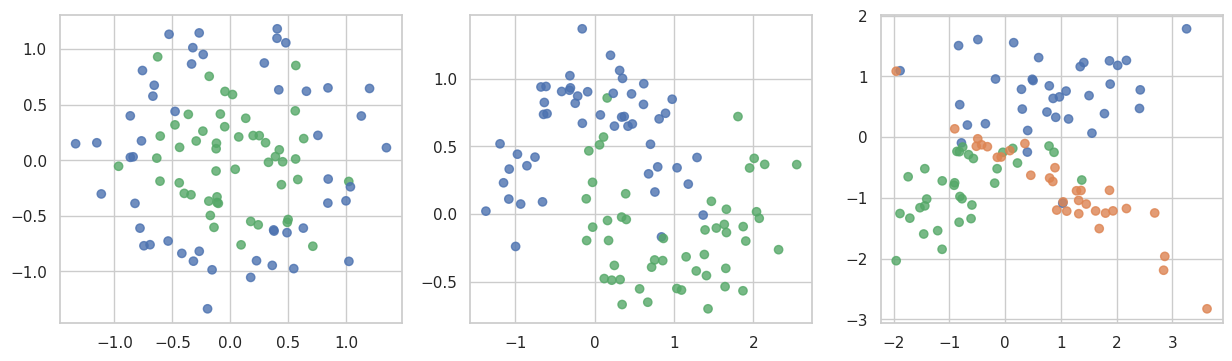

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

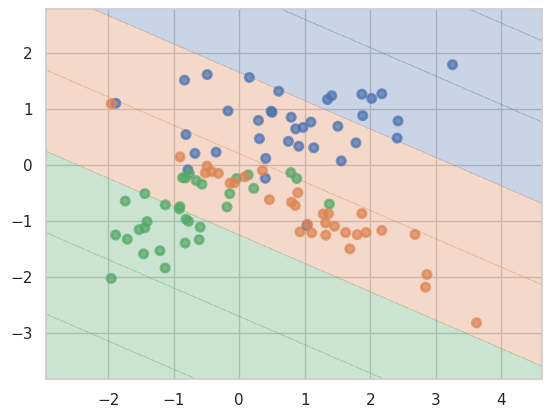

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

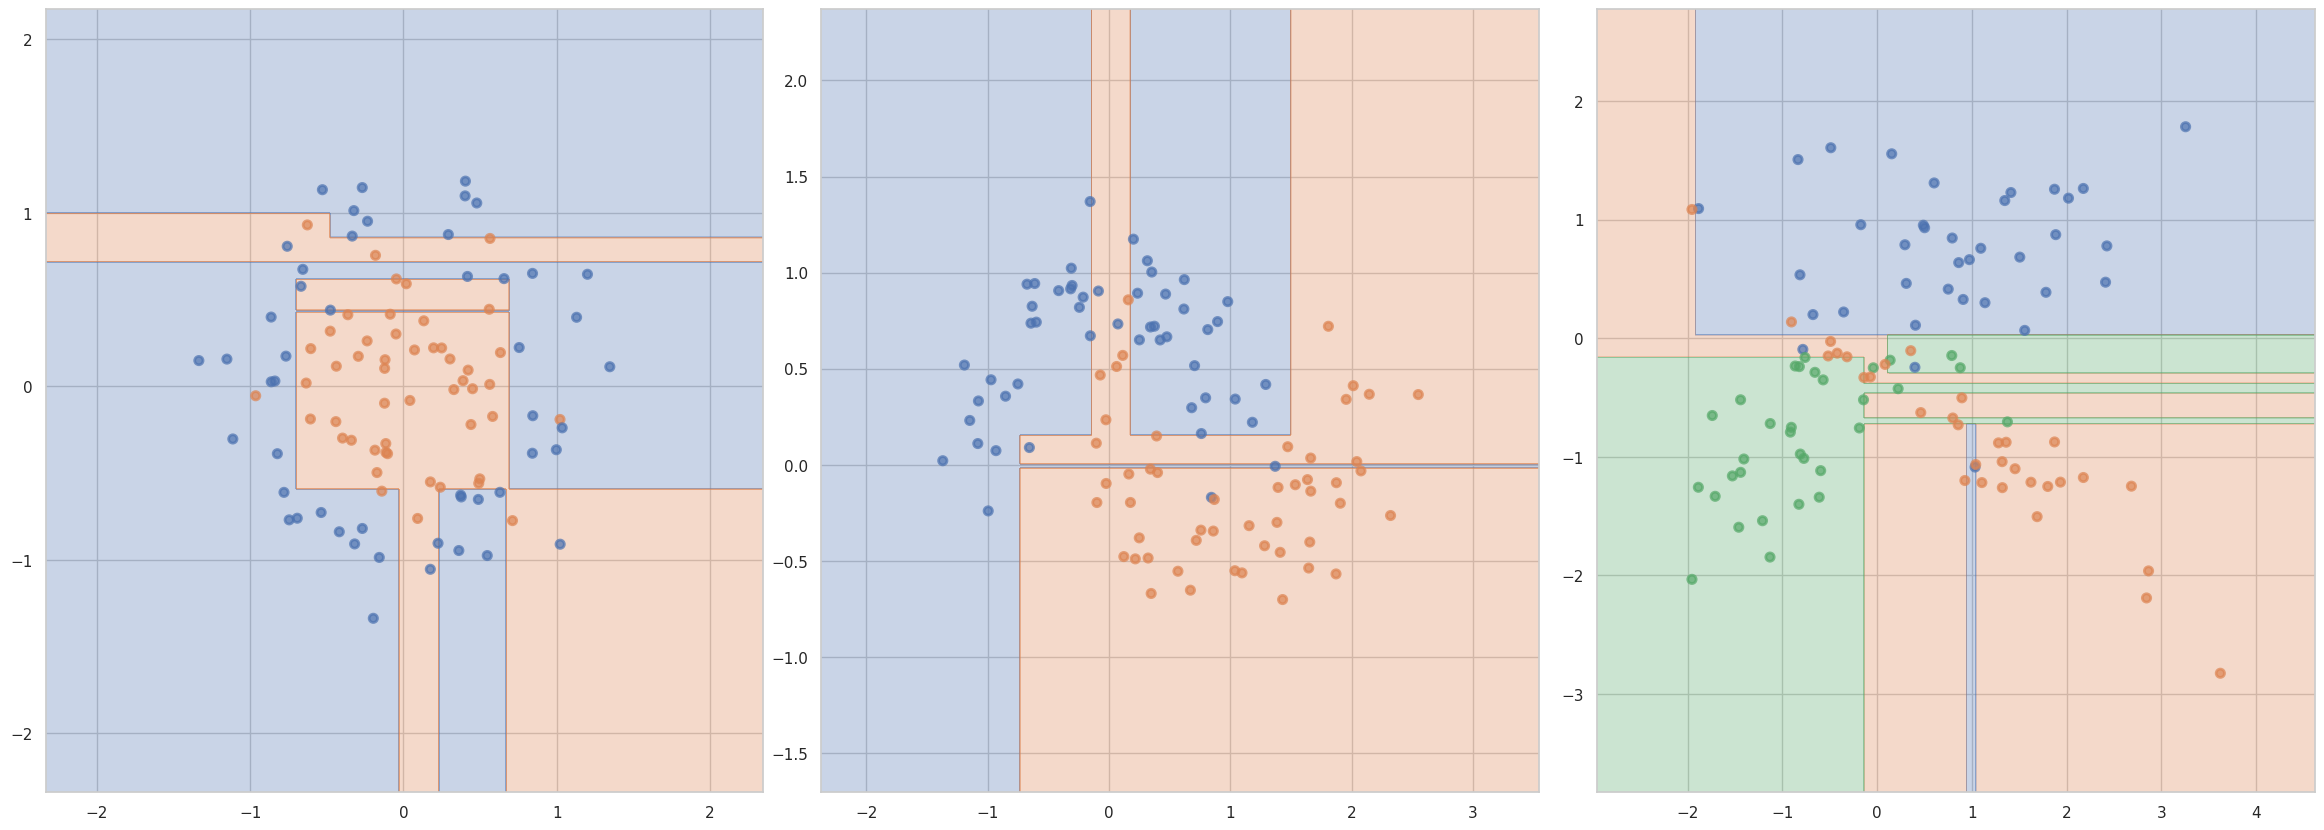

In [7]:
columns=['DATASET', 'ACCURACY_TRAIN', 'ACCURACY_TEST']
df_accuracy = pd.DataFrame(columns=columns)
plt.figure(figsize=(24, 9))
for index, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    classifier  = DecisionTreeClassifier().fit(x_train, y_train)
    plt.subplot(1, 3, index + 1)
    plot_surface(classifier, x, y)
    df_accuracy.loc[index] = {'DATASET': 'DATASET_' + str(index),
                             'ACCURACY_TRAIN': accuracy_score(y_train, classifier.predict(x_train)),
                             'ACCURACY_TEST': accuracy_score(y_test, classifier.predict(x_test))}

In [8]:
df_accuracy

,DATASET,ACCURACY_TRAIN,ACCURACY_TEST
0,DATASET_0,1.0,0.733333
1,DATASET_1,1.0,0.866667
2,DATASET_2,1.0,0.800000


__Ответ:__ Для всех трех датасетов ACCURACY_TRAIN = 1.0, ACCURACY_TEST ниже. Классификатор на основе решающих деревьев переобучился.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [9]:
max_depths = [None, 2, 4, 6]
min_samples_leafs = [1, 5, 10, 15]
columns = ['DATASET', 'MAX_DEPTH', 'MIN_SAMPLE_LEAF', 'ACCURACY_TRAIN', 'ACCURACY_TEST']

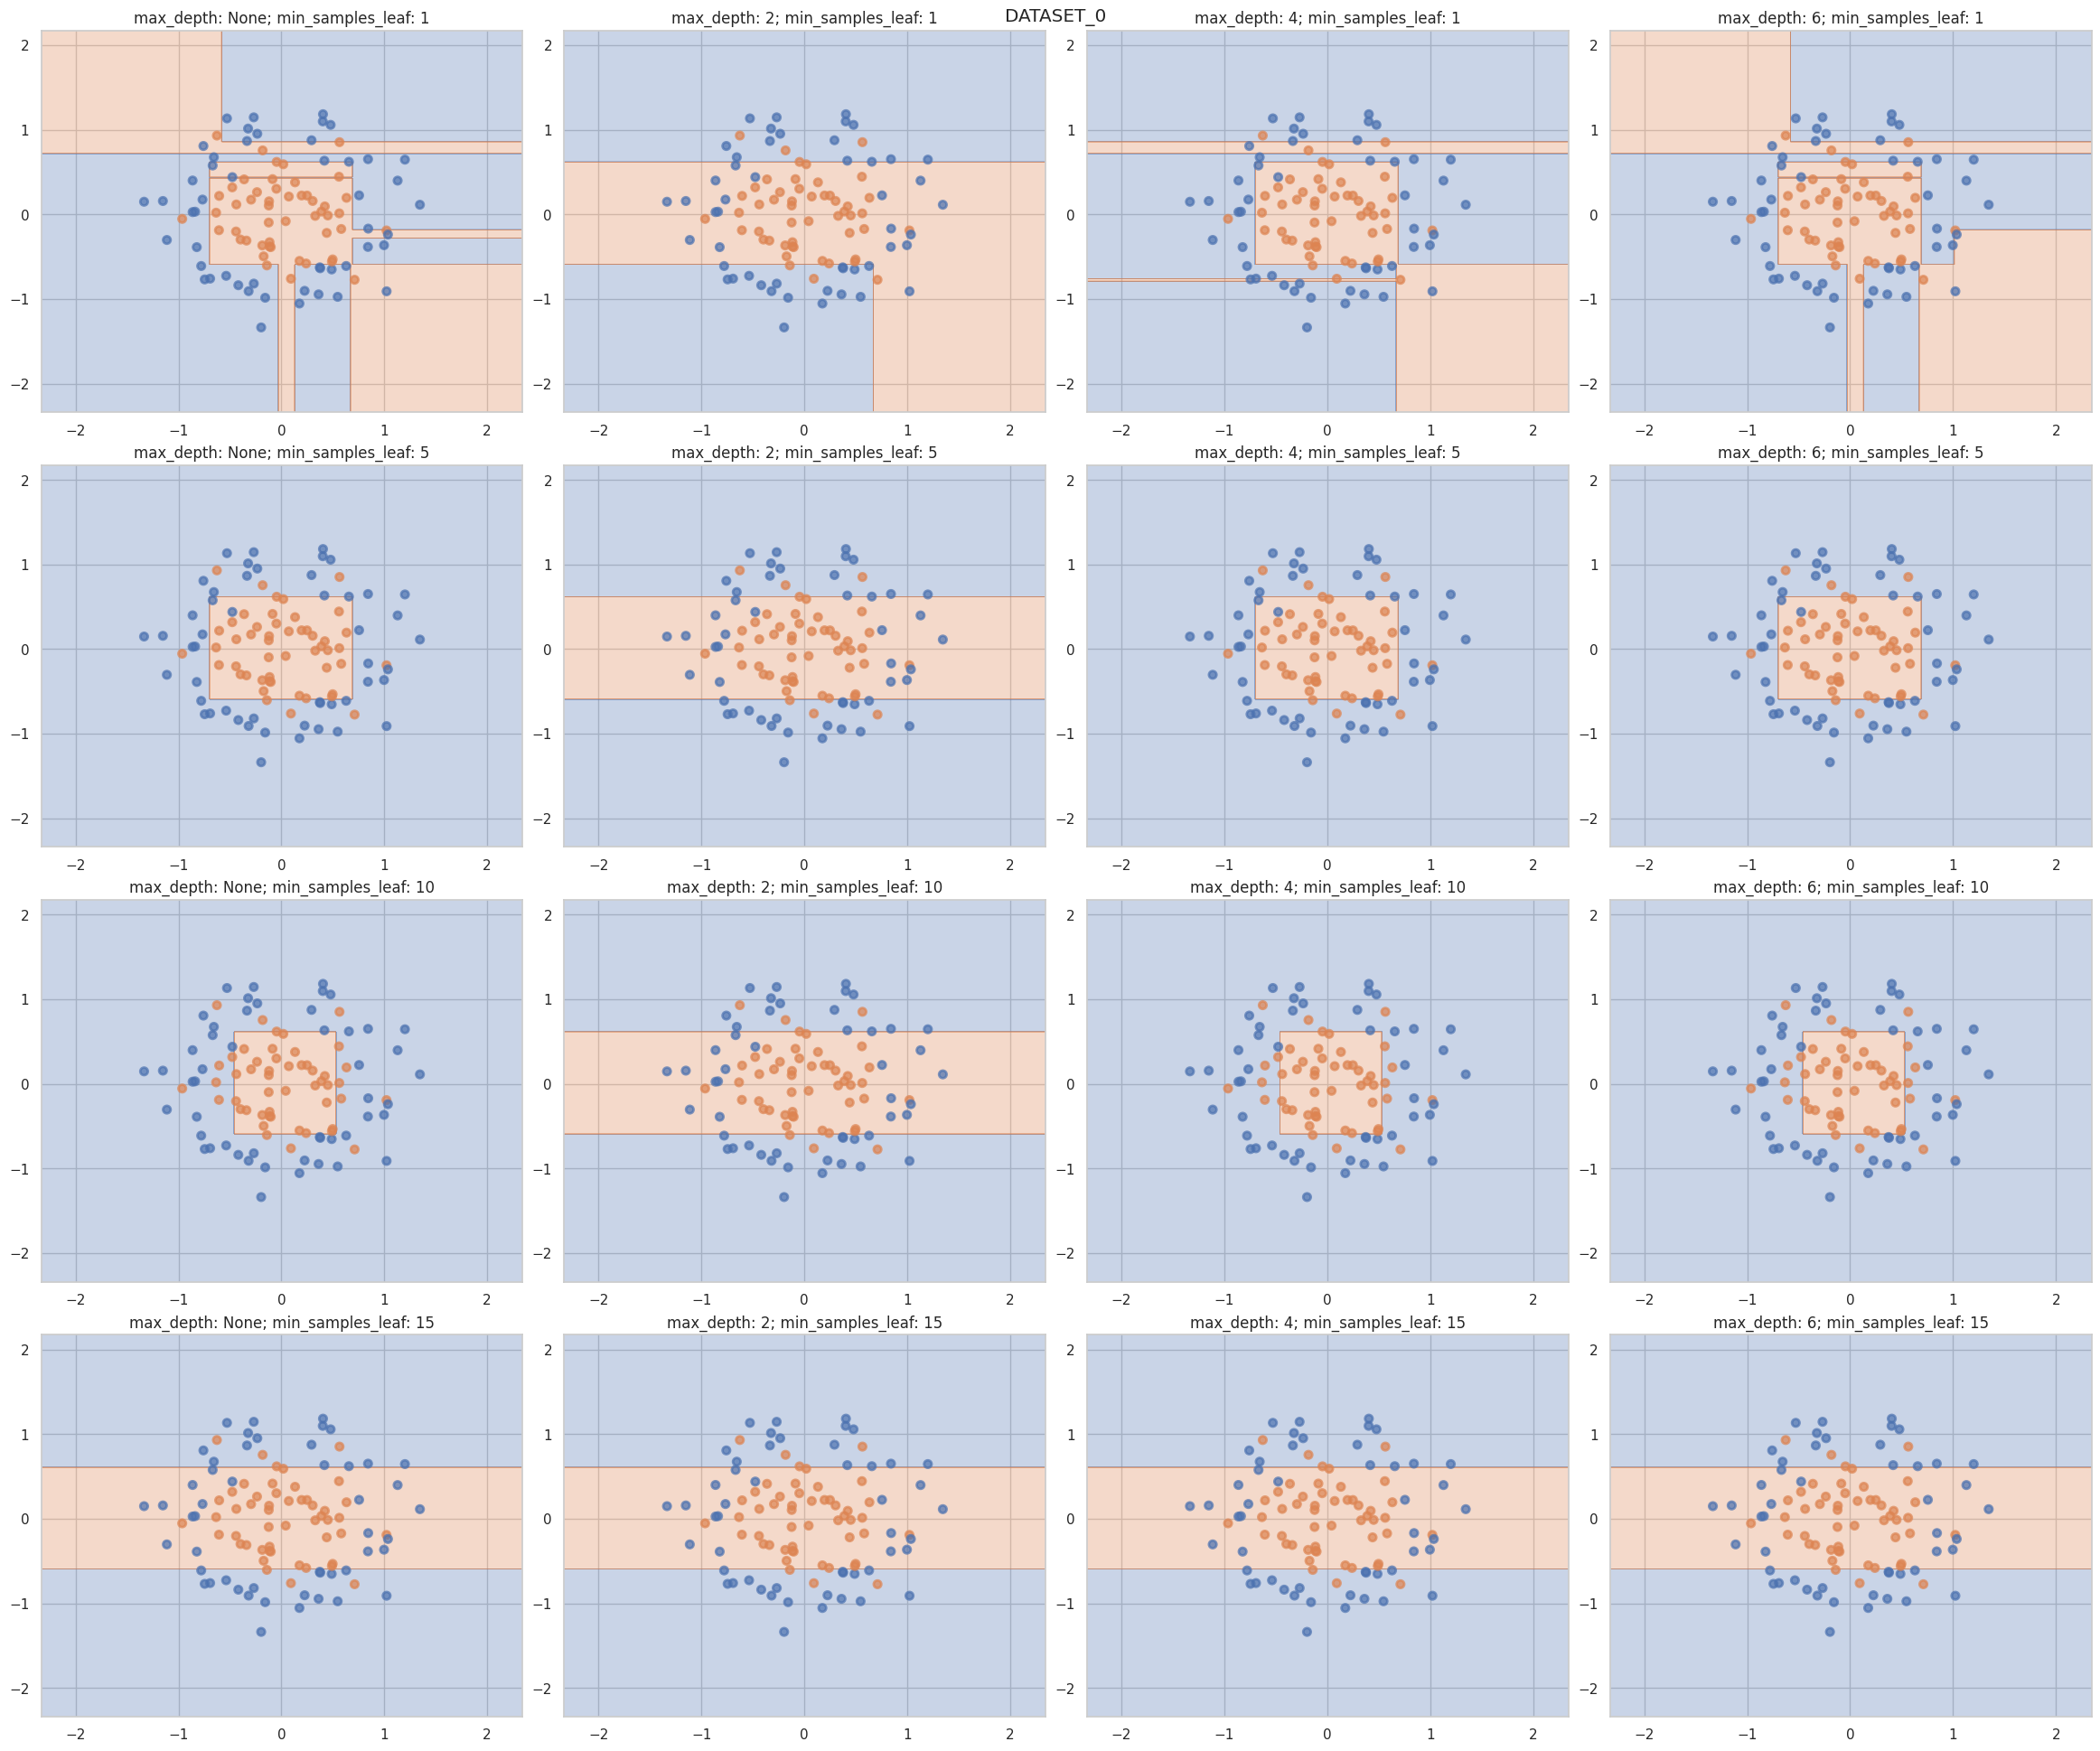

In [10]:
(x, y) = datasets[0]
df_metrics = pd.DataFrame(columns=columns)
index_ = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(24, 20))
for depth_index, max_depth_ in enumerate(max_depths):
    for leaf_index, min_samples_leaf_ in enumerate(min_samples_leafs):
        classifier  = DecisionTreeClassifier(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_).fit(x_train, y_train)
        
        ax = plt.subplot(len(max_depths), len(min_samples_leafs), depth_index + 1 + leaf_index * len(max_depths))
        ax.set_title('max_depth: {}; min_samples_leaf: {}'.format(max_depth_, min_samples_leaf_))
        plot_surface(classifier, x, y)
        df_metrics.loc[index_] = {'DATASET': 'DATASET_0',
                                  'MAX_DEPTH': max_depth_, 'MIN_SAMPLE_LEAF': min_samples_leaf_,
                                  'ACCURACY_TRAIN': accuracy_score(y_train, classifier.predict(x_train)),
                                  'ACCURACY_TEST': accuracy_score(y_test, classifier.predict(x_test))}
        index_ += 1
fig.suptitle('DATASET_0');

In [11]:
df_metrics

,DATASET,MAX_DEPTH,MIN_SAMPLE_LEAF,ACCURACY_TRAIN,ACCURACY_TEST
0,DATASET_0,None,1,1.0000,0.70
1,DATASET_0,None,5,0.9125,0.85
2,DATASET_0,None,10,0.8250,0.90
3,DATASET_0,None,15,0.7875,0.65
4,DATASET_0,2,1,0.8125,0.60
5,DATASET_0,2,5,0.8000,0.65
6,DATASET_0,2,10,0.8000,0.65
7,DATASET_0,2,15,0.7875,0.65
8,DATASET_0,4,1,0.9625,0.70
9,DATASET_0,4,5,0.9125,0.85


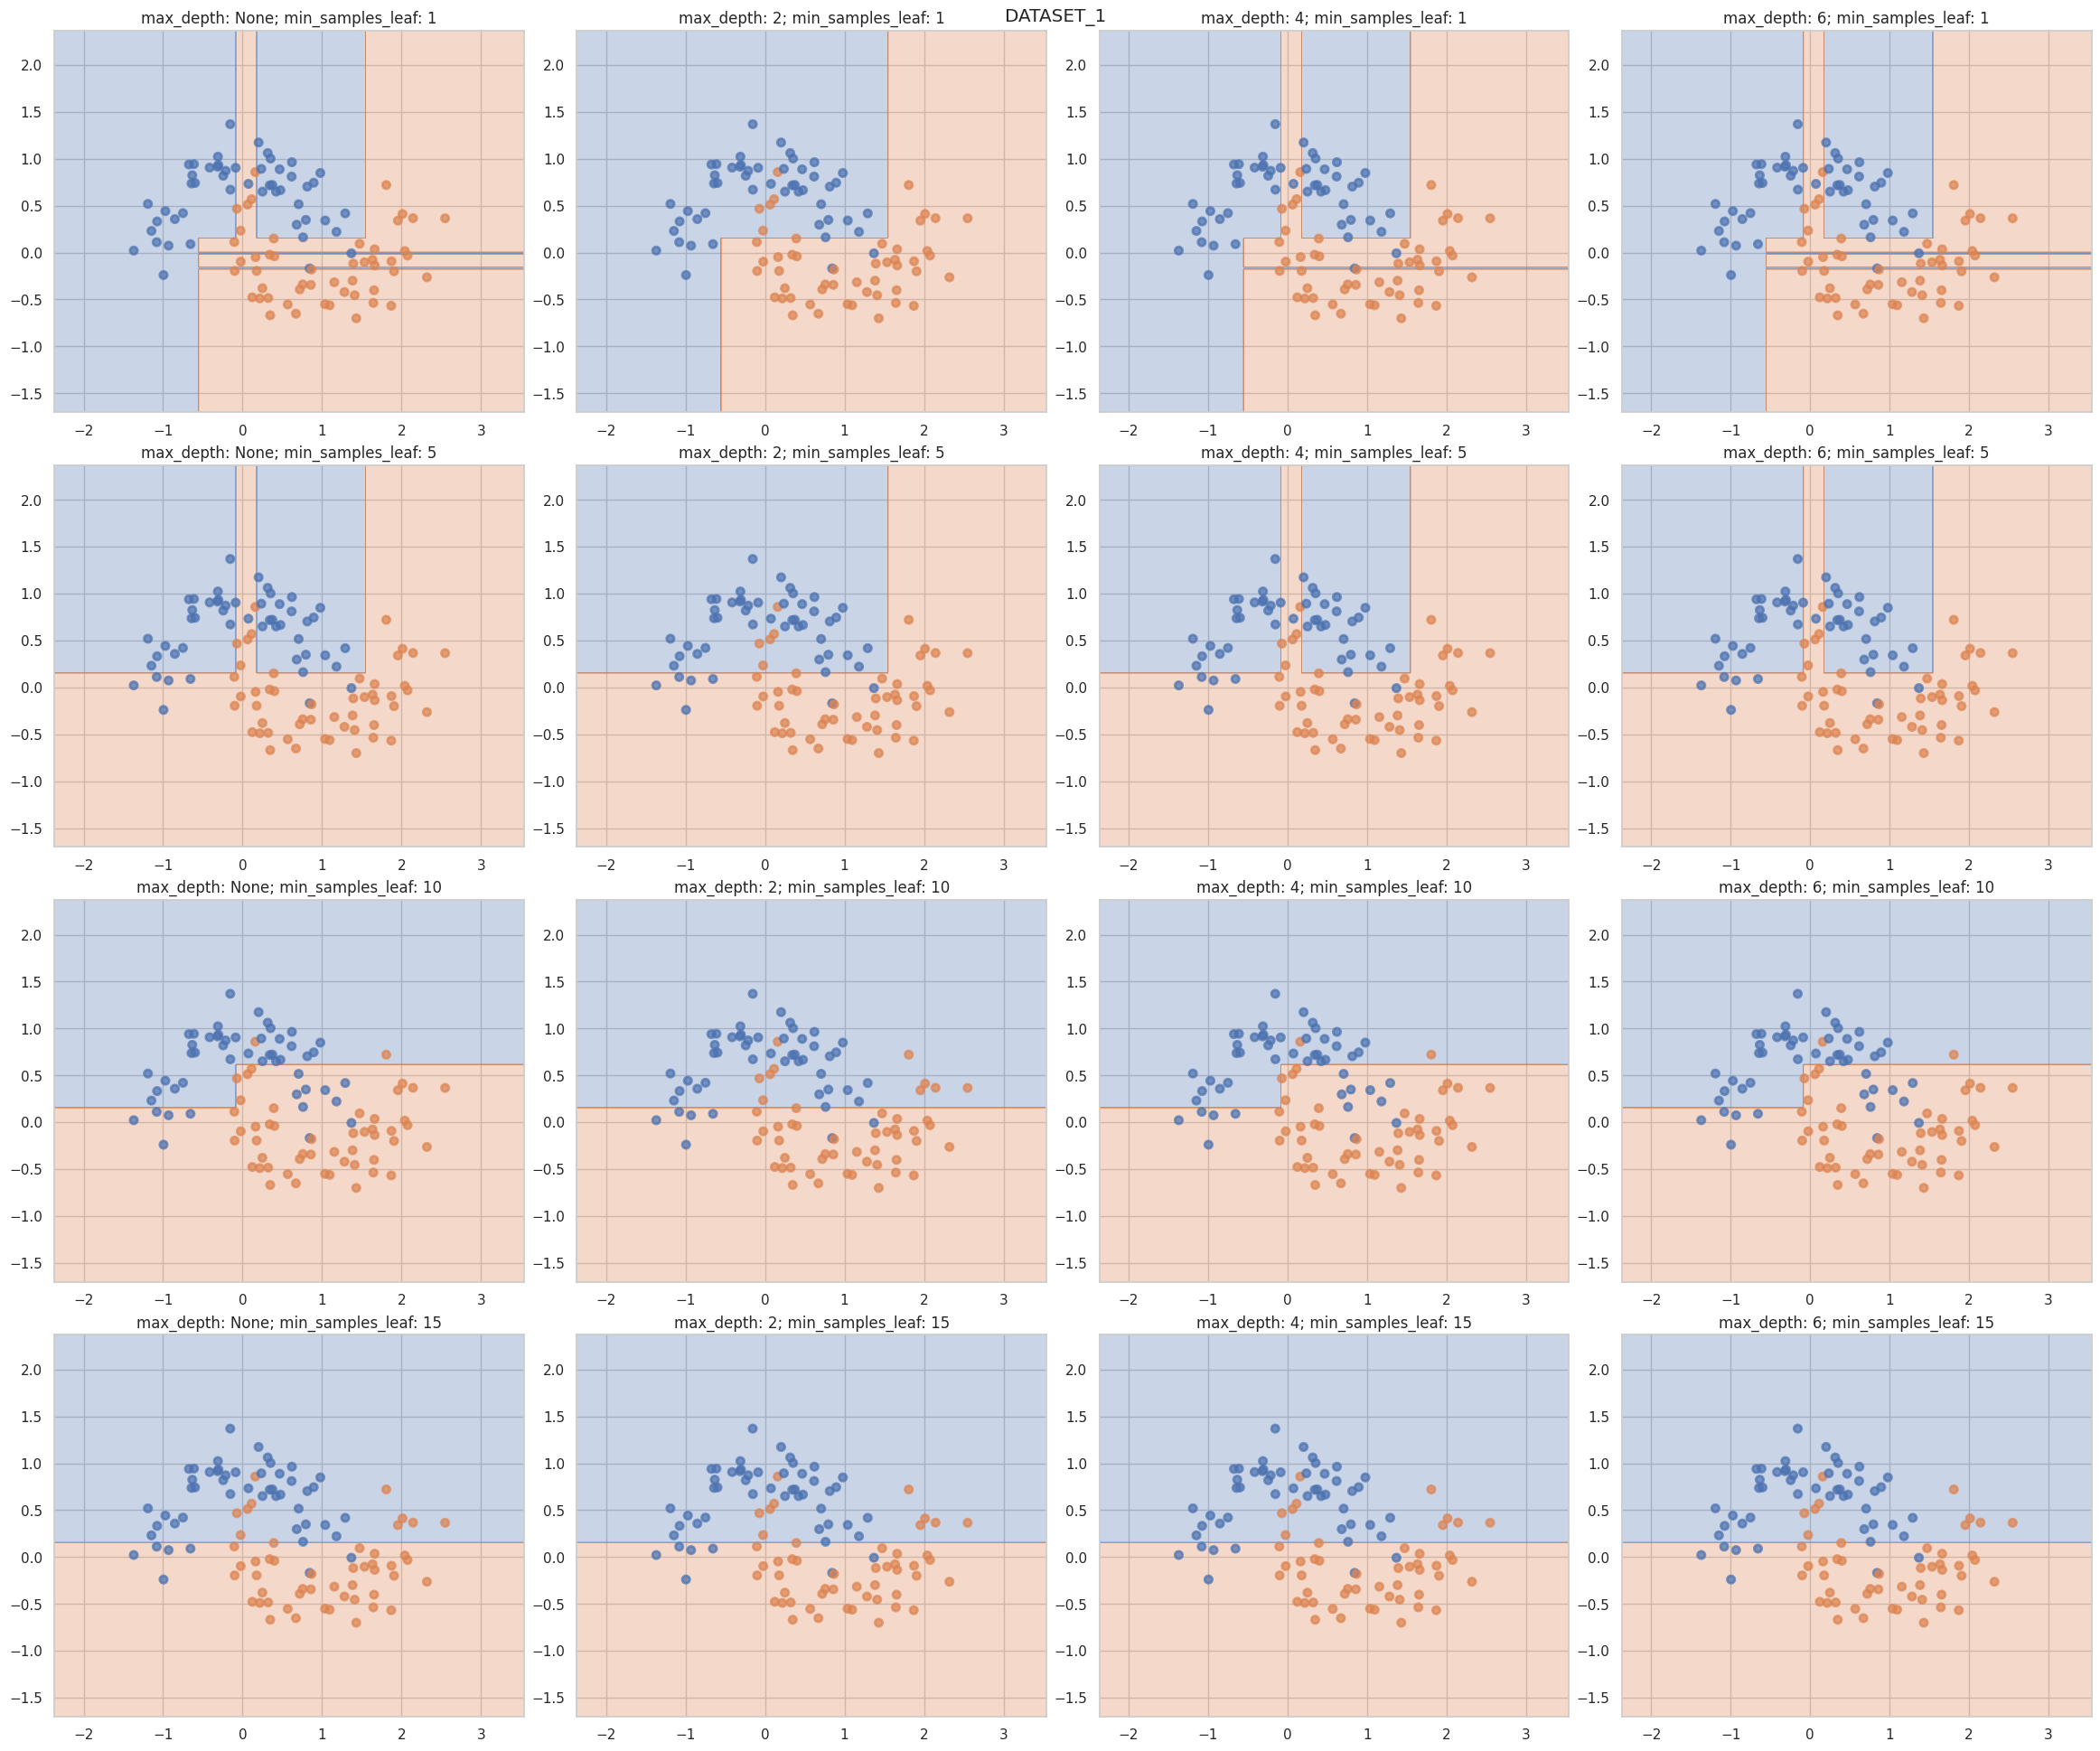

In [12]:
(x, y) = datasets[1]
df_metrics = pd.DataFrame(columns=columns)
index_ = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(24, 20))
for depth_index, max_depth_ in enumerate(max_depths):
    for leaf_index, min_samples_leaf_ in enumerate(min_samples_leafs):
        classifier  = DecisionTreeClassifier(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_).fit(x_train, y_train)
        
        ax = plt.subplot(len(max_depths), len(min_samples_leafs), depth_index + 1 + leaf_index * len(max_depths))
        ax.set_title('max_depth: {}; min_samples_leaf: {}'.format(max_depth_, min_samples_leaf_))
        plot_surface(classifier, x, y)
        df_metrics.loc[index_] = {'DATASET': 'DATASET_1',
                                  'MAX_DEPTH': max_depth_, 'MIN_SAMPLE_LEAF': min_samples_leaf_,
                                  'ACCURACY_TRAIN': accuracy_score(y_train, classifier.predict(x_train)),
                                  'ACCURACY_TEST': accuracy_score(y_test, classifier.predict(x_test))}
        index_ += 1
fig.suptitle('DATASET_1');

In [13]:
df_metrics

,DATASET,MAX_DEPTH,MIN_SAMPLE_LEAF,ACCURACY_TRAIN,ACCURACY_TEST
0,DATASET_1,None,1,1.0000,0.95
1,DATASET_1,None,5,0.9500,0.80
2,DATASET_1,None,10,0.8375,0.85
3,DATASET_1,None,15,0.8250,0.85
4,DATASET_1,2,1,0.9125,1.00
5,DATASET_1,2,5,0.8875,0.85
6,DATASET_1,2,10,0.8250,0.85
7,DATASET_1,2,15,0.8250,0.85
8,DATASET_1,4,1,0.9875,0.95
9,DATASET_1,4,5,0.9500,0.80


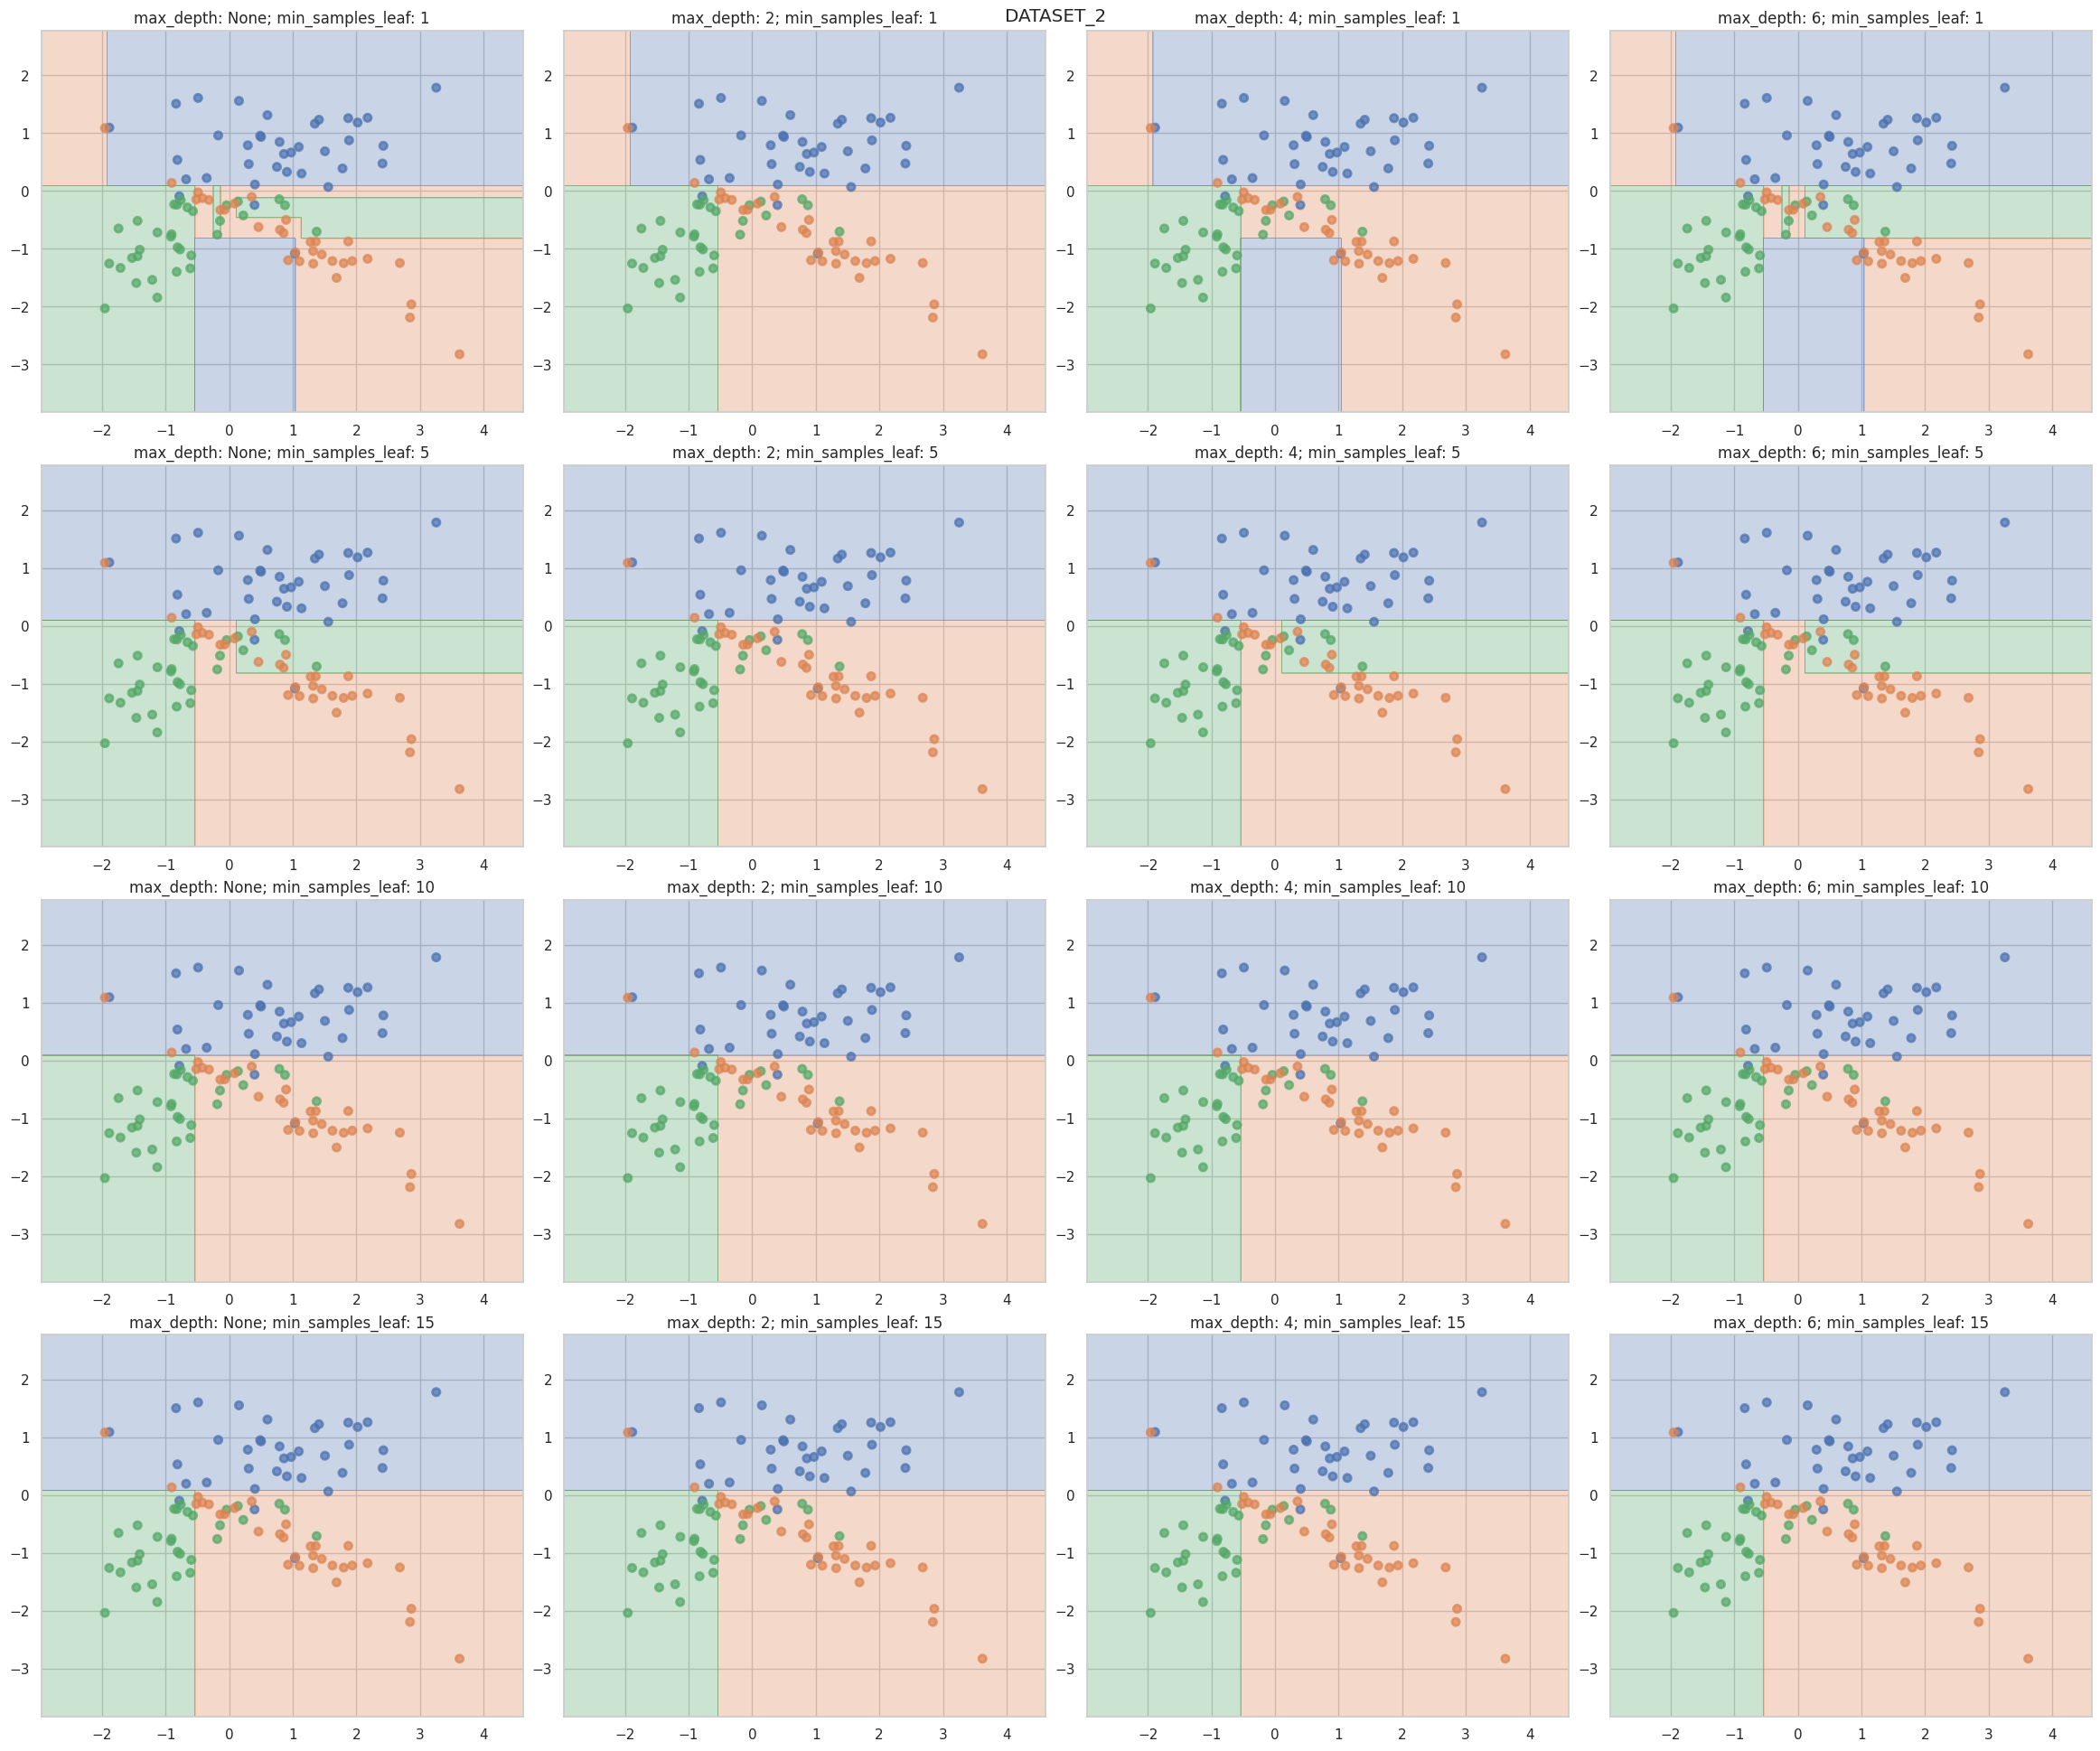

In [14]:
(x, y) = datasets[2]
df_metrics = pd.DataFrame(columns=columns)
index_ = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(24, 20))
for depth_index, max_depth_ in enumerate(max_depths):
    for leaf_index, min_samples_leaf_ in enumerate(min_samples_leafs):
        classifier  = DecisionTreeClassifier(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_).fit(x_train, y_train)
        
        ax = plt.subplot(len(max_depths), len(min_samples_leafs), depth_index + 1 + leaf_index * len(max_depths))
        ax.set_title('max_depth: {}; min_samples_leaf: {}'.format(max_depth_, min_samples_leaf_))
        plot_surface(classifier, x, y)
        df_metrics.loc[index_] = {'DATASET': 'DATASET_2',
                                  'MAX_DEPTH': max_depth_, 'MIN_SAMPLE_LEAF': min_samples_leaf_,
                                  'ACCURACY_TRAIN': accuracy_score(y_train, classifier.predict(x_train)),
                                  'ACCURACY_TEST': accuracy_score(y_test, classifier.predict(x_test))}
        index_ += 1
fig.suptitle('DATASET_2');

In [15]:
df_metrics

,DATASET,MAX_DEPTH,MIN_SAMPLE_LEAF,ACCURACY_TRAIN,ACCURACY_TEST
0,DATASET_2,None,1,1.0000,0.70
1,DATASET_2,None,5,0.9000,0.70
2,DATASET_2,None,10,0.8875,0.75
3,DATASET_2,None,15,0.8875,0.75
4,DATASET_2,2,1,0.9000,0.75
5,DATASET_2,2,5,0.8875,0.75
6,DATASET_2,2,10,0.8875,0.75
7,DATASET_2,2,15,0.8875,0.75
8,DATASET_2,4,1,0.9125,0.70
9,DATASET_2,4,5,0.9000,0.70


__Ответ:__ При увеличении min_sample_leaf accuracy_train снижается, а accuracy_test растет. Увеличение max_depth ведет к росту accuracy_train, и к снижению accuracy_test. Таким образом уменьшение минимального количества объектов в листе (параметр min_sample_leaf) приводит к переобучению (модель сильнее "подгоняется" под трейн). Увеличение количества листьев (параметр max_depth) также ведёт к переобучению модели.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [16]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


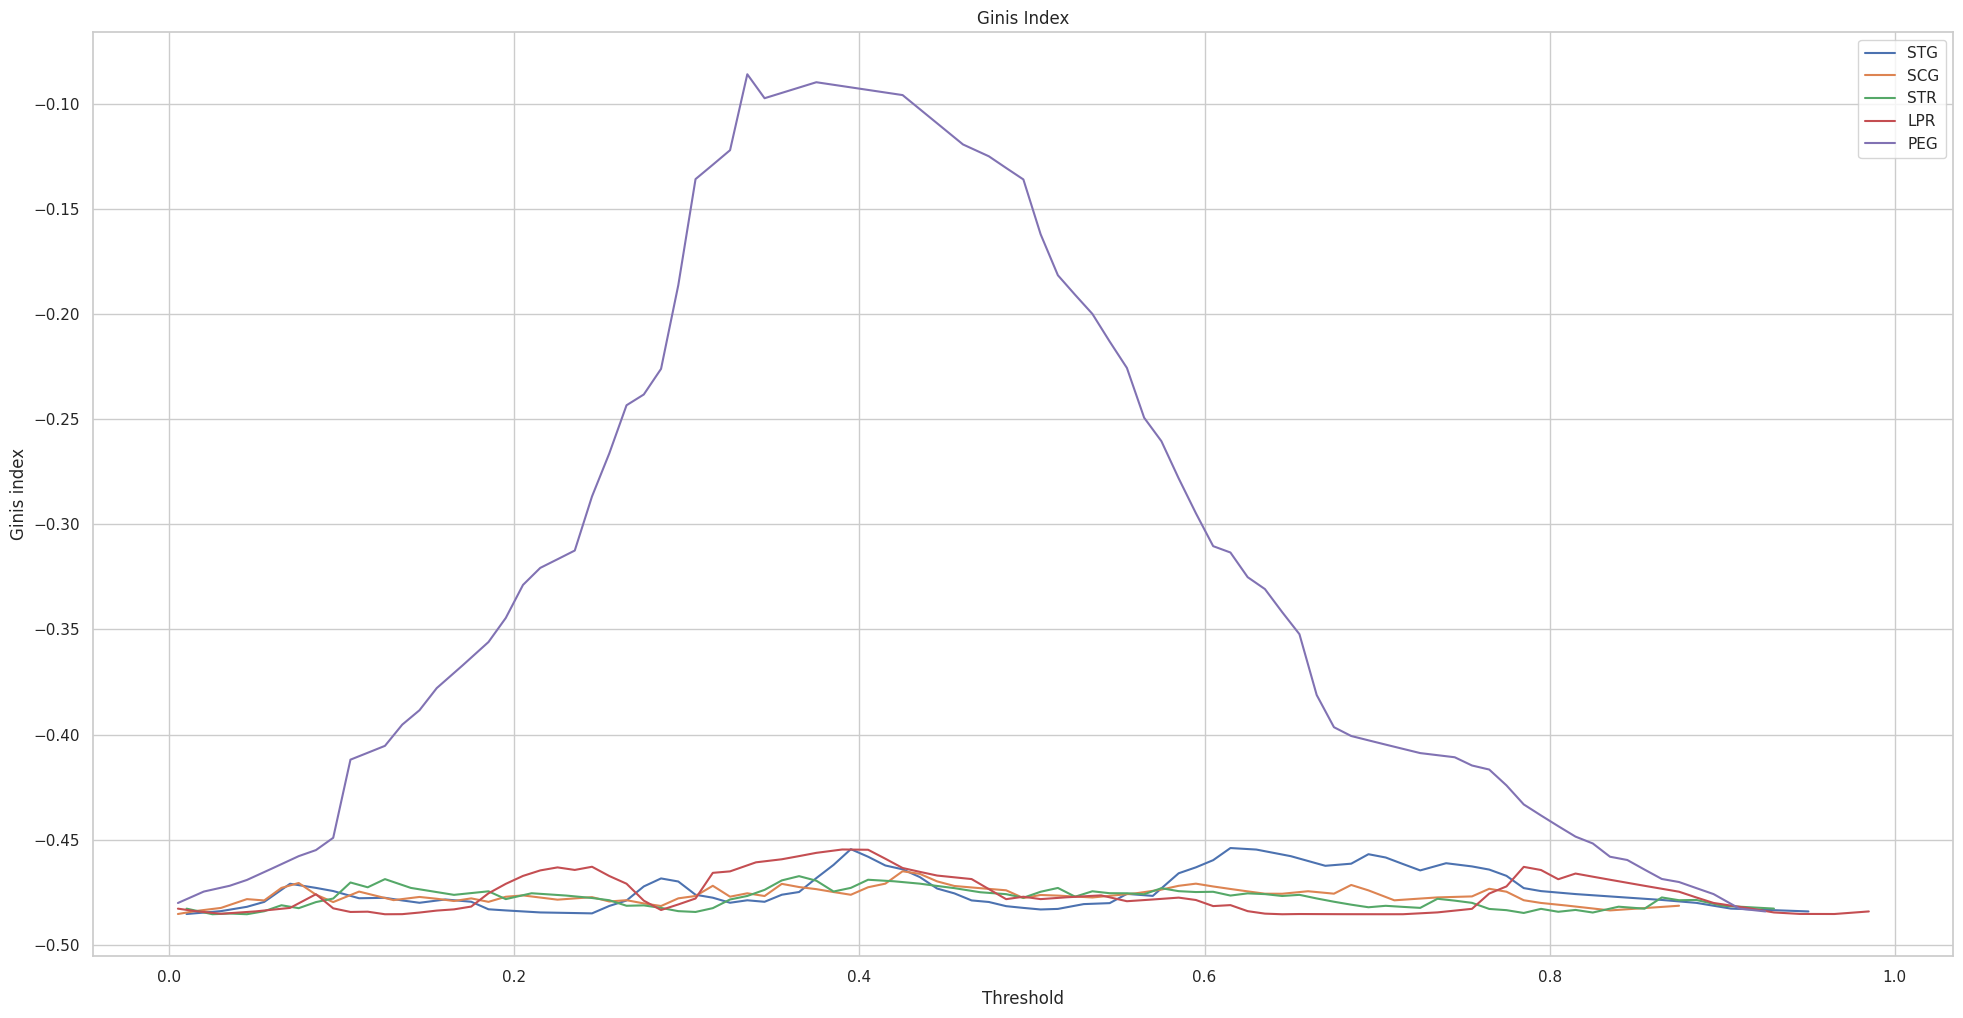

In [17]:
from tree_code import find_best_split

x = df.drop('UNS', axis=1)
y = df['UNS']
fig, ax = plt.subplots(figsize=(24, 12))
for feature in df.columns[:-1]:
    thresholds, ginis, _, _ = find_best_split(x[feature], np.array(y))
    ax.plot(thresholds, ginis, label=feature)
    
plt.legend(labels=df.columns[:-1])
plt.title('Ginis Index')
plt.xlabel('Threshold')
plt.ylabel('Ginis index')
plt.show()

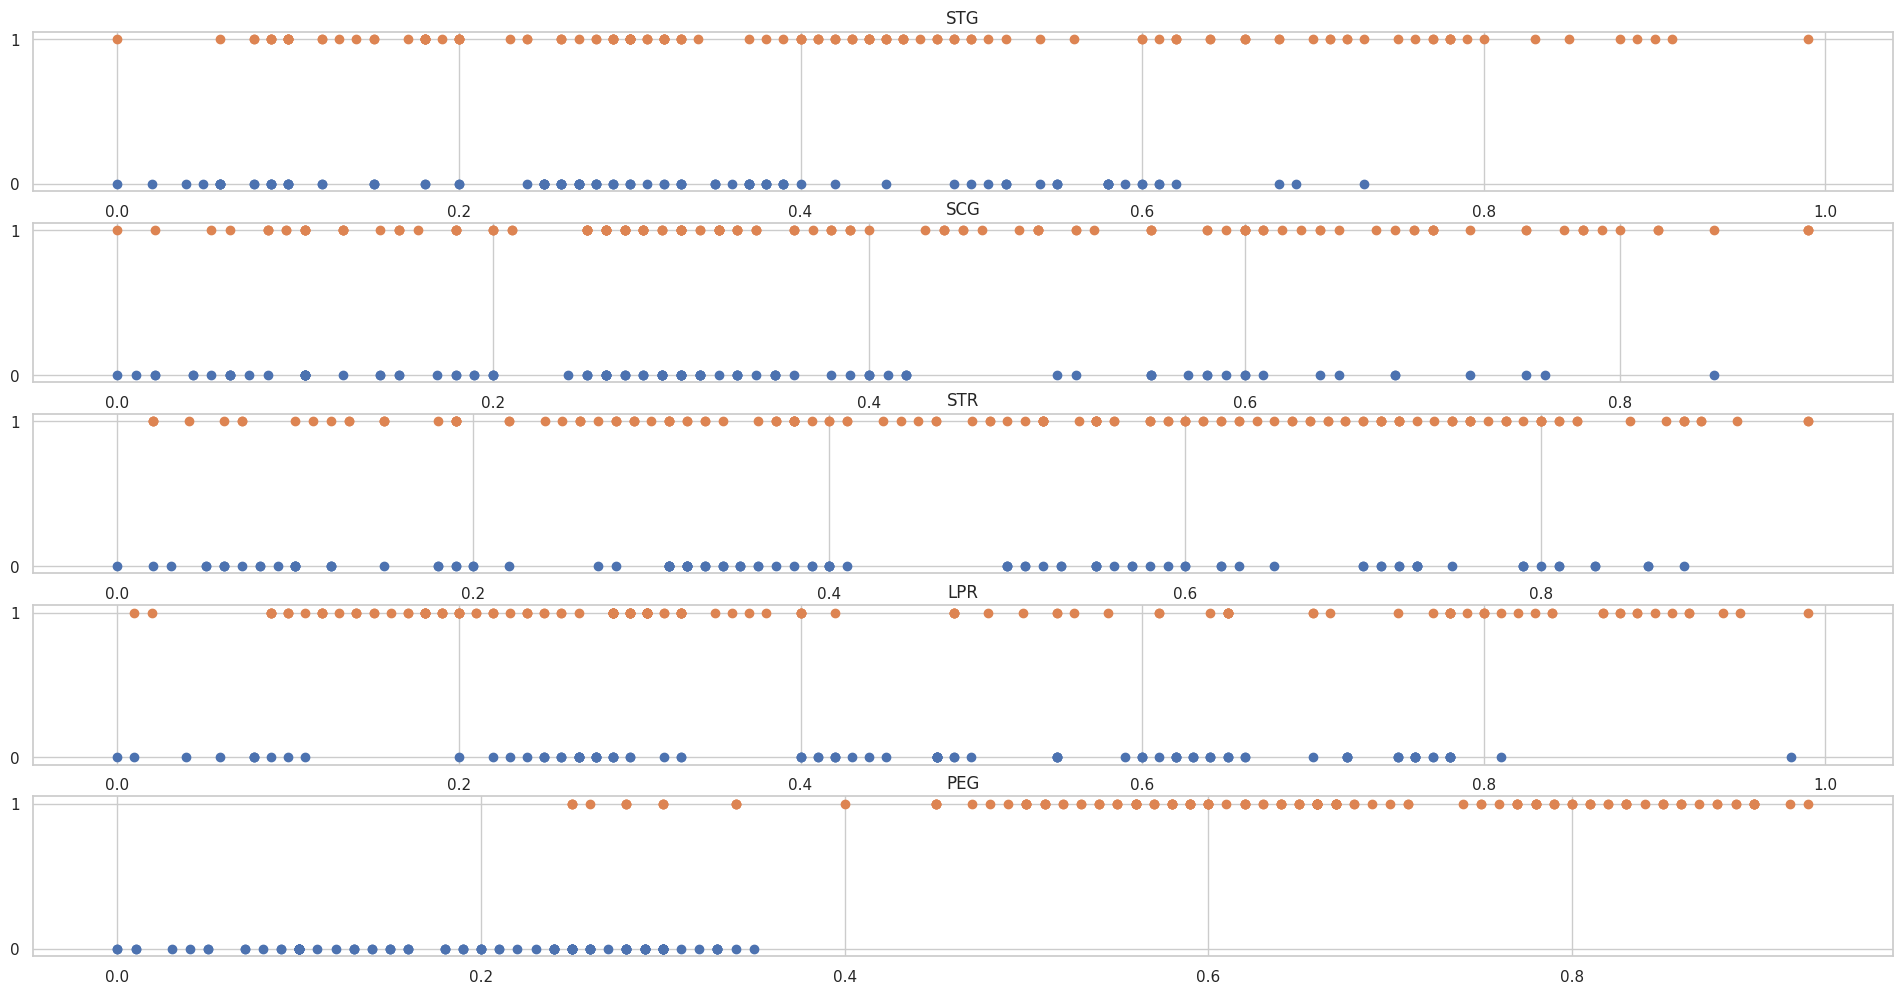

In [18]:
fig, ax = plt.subplots(5, 1, figsize=(24,12))
for index, feature in enumerate(x.columns):
    ax[index].scatter(x[y == 0][feature], y[y == 0])
    ax[index].scatter(x[y == 1][feature], y[y == 1])
    ax[index].set(title=feature)
    ax[index].yaxis.set_ticks([0, 1])
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Разделять выборку на два поддерева стоит по признаку PEG: на данной кривое есть явно выраженный максимум. Данный признак также является лучшим выбором для разделения выборки по оценке scatter-графика, так как "перекрытие" классов на scatter-графике PEG минимально, по сравнению с другими признаками. Кривая для "хороших" признаков должна иметь четко выраженный экстремум (минимум или максимум), и на scatter-графике "перекрытие" классов должно быть минимально.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




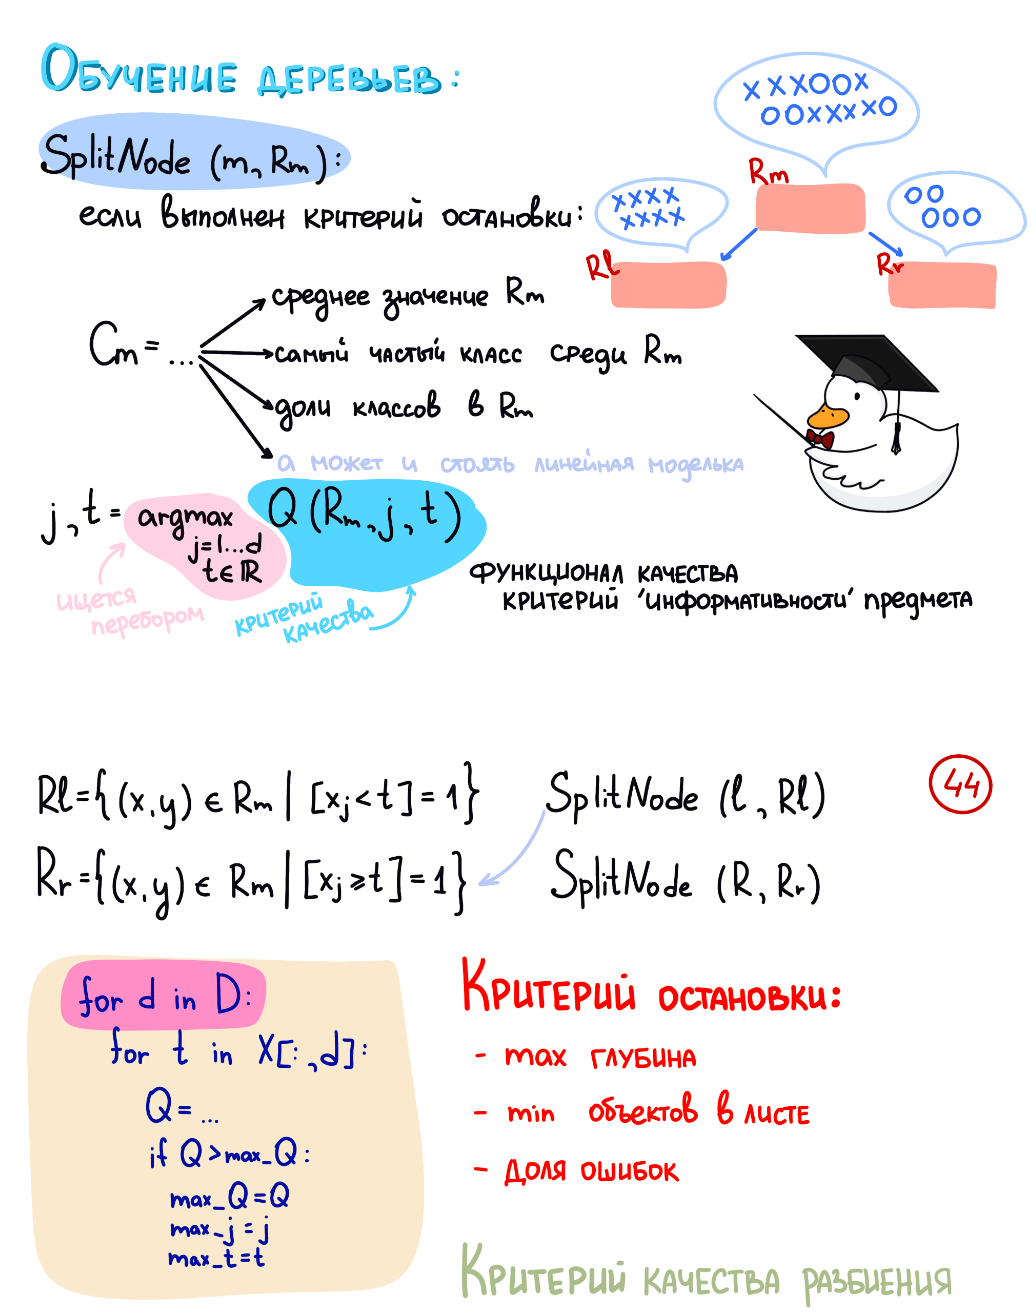

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [19]:
df = pd.read_csv('agaricus-lepiota.data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [20]:
from sklearn.preprocessing import LabelEncoder
from tree_code import DecisionTree

x = df.drop('p', axis=1)
y = df['p']

encoder = LabelEncoder()

for column in x.columns:
  x[column] = encoder.fit_transform(x[column])
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

classifier = DecisionTree(['categorical'] * x.shape[1])
classifier.fit(np.array(x_train), np.array(y_train))

print(f'accuracy train: {accuracy_score(classifier.predict(np.array(x_train)), y_train): .2f}')
print(f'accuracy test: {accuracy_score(classifier.predict(np.array(x_test)), y_test): .2f}')

accuracy train:  1.00
accuracy test:  0.99


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [21]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from tree_code import DecisionTree
from sklearn.model_selection import cross_val_score, KFold


le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)
df_metrics = pd.DataFrame(columns=['real', 'categorical', 'real+ohe', 'DecisionTreeClassifier'])

In [22]:
def get_accuracies(x, y):
    tree = DecisionTree(['real'] * x.shape[1])
    accuracy_1 = np.mean(cross_val_score(tree, X=np.array(x), y=np.array(y), cv=KFold(n_splits=10),
                                         scoring=make_scorer(accuracy_score), n_jobs=-1))

    tree = DecisionTree(['categorical'] * x.shape[1])
    accuracy_2 = np.mean(cross_val_score(tree, X=np.array(x), y=np.array(y), cv=KFold(n_splits=10),
                                         scoring=make_scorer(accuracy_score), n_jobs=-1))

    x_ohe = ohe.fit_transform(x)
    tree = DecisionTree(['real'] * x_ohe.shape[1])
    accuracy_3 = np.mean(cross_val_score(tree, X=np.array(x_ohe), y=np.array(y), cv=KFold(n_splits=10),
                                         scoring=make_scorer(accuracy_score), n_jobs=-1))

    tree = DecisionTreeClassifier()
    accuracy_4 = np.mean(cross_val_score(tree, X=np.array(x), y=np.array(y), cv=KFold(n_splits=10),
                                         scoring=make_scorer(accuracy_score), n_jobs=-1))
    return [accuracy_1, accuracy_2, accuracy_3, accuracy_4]

In [23]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
x_mushrooms = mushrooms.drop('p', axis=1)
y_mushrooms = mushrooms['p']

for column in x_mushrooms.columns:
    x_mushrooms[column] = le.fit_transform(x_mushrooms[column])
y_mushrooms = le.fit_transform(y_mushrooms)
df_metrics.loc['mushrooms'] = get_accuracies(x_mushrooms, y_mushrooms)

In [24]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
x_tic = tic_tac_toe.drop('positive', axis=1)
y_tic = tic_tac_toe['positive']

for column in x_tic.columns:
    x_tic[column] = le.fit_transform(x_tic[column])
y_tic = le.fit_transform(y_tic)
df_metrics.loc['tic_tac_toe'] = get_accuracies(x_tic, y_tic)

In [25]:
cars = pd.read_csv('car.data')
cars.loc[((cars['unacc'] == 'unacc') | (cars['unacc'] == 'acc')), 'unacc'] = 0
cars.loc[((cars['unacc'] == 'good') | (cars['unacc'] == 'vgood')), 'unacc'] = 1
x_cars = cars.drop('unacc', axis=1)
y_cars = cars['unacc']

for column in x_cars.columns:
    x_cars[column] = le.fit_transform(x_cars[column])
y_cars = le.fit_transform(y_cars)
df_metrics.loc['cars'] = get_accuracies(x_cars, y_cars)

In [26]:
nursery = pd.read_csv('nursery.data')
nursery.loc[((nursery['recommend'] == 'not_recom') | (nursery['recommend'] == 'recommend')), 'recommend'] = 0
nursery.loc[((nursery['recommend'] == 'priority') | (nursery['recommend'] == 'very_recom') | (
            nursery['recommend'] == 'spec_prior')), 'recommend'] = 1
x_nursery = nursery.drop('recommend', axis=1)
y_nursery = nursery['recommend']

for column in x_nursery.columns:
    x_nursery[column] = le.fit_transform(x_nursery[column])
y_nursery = le.fit_transform(y_nursery)
df_metrics.loc['nursery'] = get_accuracies(x_nursery, y_nursery)

In [27]:
df_metrics

,real,categorical,real+ohe,DecisionTreeClassifier
mushrooms,0.991630,0.988557,0.966534,0.999261
tic_tac_toe,0.501590,0.531546,0.367939,0.473180
cars,0.942607,0.908533,0.919263,0.935042
nursery,0.999074,0.998534,0.999228,0.999846


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Для датасетов mushrooms, cars & nursery все алгоритмы показали примерно одинаковые результаты. Для датасета tic-tac-toe все четыре алгоритма показали худшие результаты. Думаю, что это связано с тем, что классификаторы на основе решающих деревьев, не подходят для решения данной проблемы. Случайная компонента, если и присутствует в результатах, то она сведена к минимуму, так как accuracy расчитывается как среднее по результатам кросс-валидации.

# Как дела?

Закрываем долги, готовимся к экзамену.